In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [26]:
train = pd.read_csv("https://raw.githubusercontent.com/jamshid-ds/Bank-Marketing-Campaign/main/data/train.csv") # Train set
test = pd.read_csv("https://raw.githubusercontent.com/jamshid-ds/Bank-Marketing-Campaign/main/data/test.csv") # Test set
train.sample(10)

,id,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,subscribe
11104,18457,35,blue-collar,single,secondary,no,1934,no,yes,cellular,16,apr,169,1,136,1,success,yes
20223,16945,45,services,single,primary,no,-41,yes,no,cellular,30,may,21,14,-1,0,NaN,no
7086,5796,59,unemployed,divorced,tertiary,yes,512,yes,no,cellular,19,nov,114,1,-1,0,NaN,no
23292,17916,55,technician,married,primary,no,-16,no,no,cellular,8,jul,80,4,-1,0,NaN,no
18079,41144,30,blue-collar,married,primary,no,60,yes,no,cellular,6,nov,155,1,180,1,success,no
8919,21243,42,blue-collar,married,primary,no,2485,yes,no,telephone,13,feb,162,9,187,4,failure,no
1427,8865,50,housemaid,married,primary,no,115,no,no,cellular,18,nov,80,1,-1,0,NaN,no
6927,38793,30,admin.,single,secondary,no,786,yes,no,NaN,15,may,261,3,-1,0,NaN,no
23451,28595,32,blue-collar,married,secondary,no,-49,yes,no,NaN,21,jun,162,2,-1,0,NaN,no
31491,14490,32,services,single,secondary,no,519,no,no,cellular,17,may,124,2,-1,0,NaN,no


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34000 entries, 0 to 33999
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           34000 non-null  int64 
 1   age          34000 non-null  int64 
 2   job          33933 non-null  object
 3   marital      34000 non-null  object
 4   education    32141 non-null  object
 5   default      34000 non-null  object
 6   balance      34000 non-null  int64 
 7   housing      34000 non-null  object
 8   loan         34000 non-null  object
 9   contact      25271 non-null  object
 10  day_of_week  34000 non-null  int64 
 11  month        34000 non-null  object
 12  duration     34000 non-null  int64 
 13  campaign     34000 non-null  int64 
 14  pdays        34000 non-null  int64 
 15  previous     34000 non-null  int64 
 16  poutcome     8529 non-null   object
 17  subscribe    34000 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.7+ MB


In [7]:
train.isna().sum()

id                 0
age                0
job               67
marital            0
education       1859
default            0
balance            0
housing            0
loan               0
contact         8729
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       25471
subscribe          0
dtype: int64

In [8]:
train.shape

(34000, 18)

In [29]:
train.dropna()
test.dropna()

,id,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
3,20804,33,unemployed,single,tertiary,no,2101,yes,no,cellular,14,feb,203,2,180,1,failure
11,654,32,admin.,single,secondary,no,2257,yes,no,cellular,19,jun,296,1,350,3,other
19,10452,30,self-employed,single,tertiary,no,900,yes,no,cellular,31,jul,329,1,-1,3,other
26,24633,46,blue-collar,single,primary,no,995,no,no,telephone,11,dec,161,5,89,0,success
28,28213,33,management,single,tertiary,no,3456,yes,no,cellular,2,feb,526,3,282,3,failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8482,21765,31,technician,married,secondary,no,1644,no,no,cellular,5,feb,309,1,178,7,success
8487,20163,31,technician,single,secondary,no,194,no,no,cellular,4,feb,105,1,131,3,other
8489,19523,42,technician,married,secondary,no,114,yes,no,cellular,2,nov,163,1,180,1,other
8492,2358,49,management,married,tertiary,no,943,yes,no,cellular,14,nov,218,2,343,2,other


In [31]:
train.drop(['id', 'poutcome'], axis=1, inplace=True)
test.drop(['id', 'poutcome'], axis=1, inplace=True)

In [30]:
#VISUALISATION

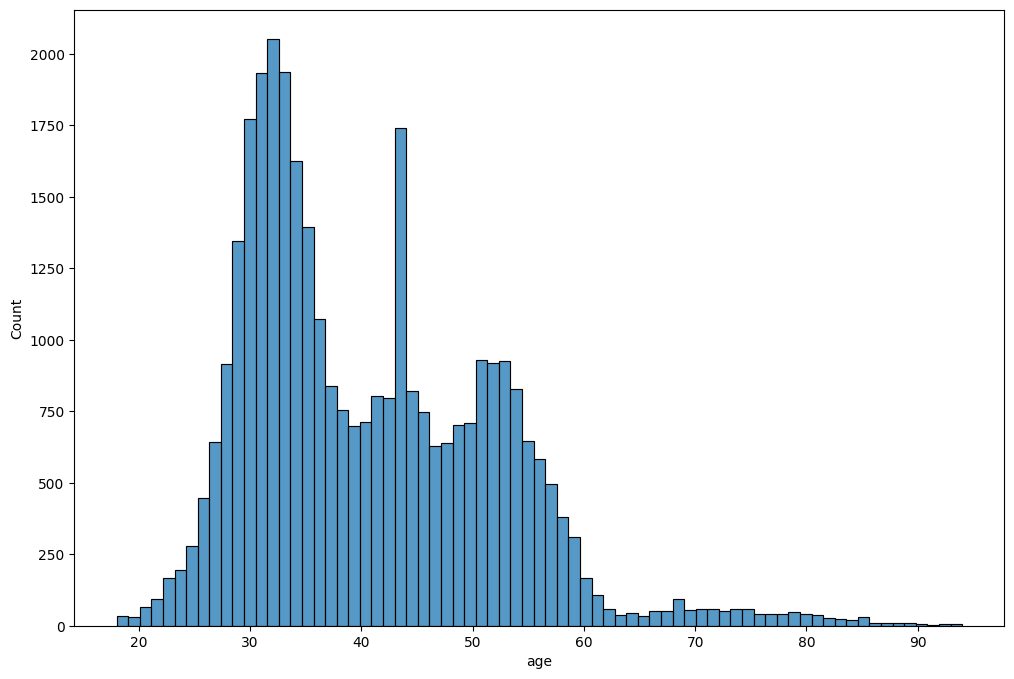

In [25]:
plt.figure(figsize=(12,8))
sns.histplot(data=train['age'])
plt.show()

Most of the users are 43 year olds

<Axes: >

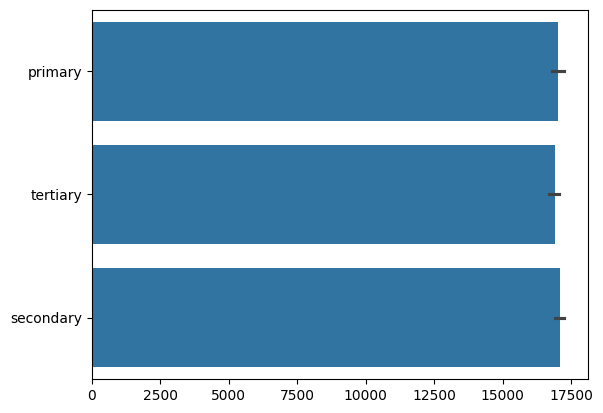

In [39]:
sns.barplot(data=train['education'].values)

In [40]:
train.subscribe

0         no
1        yes
2        yes
3         no
4         no
        ... 
33995    yes
33996     no
33997     no
33998     no
33999     no
Name: subscribe, Length: 34000, dtype: object

In [41]:
status = train.copy()

In [73]:
status.subscribe.replace({'no':0, 'yes':1}, inplace=True)
data_train, data_test = train_test_split(status, test_size=0.1, random_state=1)

In [72]:
x = data_train.drop('subscribe', axis=1)
y=data_train.subscribe

Now we separate data into two to get tes ds

In [74]:
x_test = data_test.drop('subscribe',axis=1)
y_test = data_test['subscribe']

In [85]:
object_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan',  'month', 'day_of_week', 'pdays']  # Add more column names if needed, e.g. ['column_name1', 'column_name2']

# Define the numerical columns (replace 'column_name' with the actual column names)
num_cols = ['age', 'balance', 'duration']  # Add more column names if needed, e.g. ['column_name3', 'column_name4']




In [86]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
object_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# create a pipeline for min-max scaling the numeric columns
num_pipeline = Pipeline([
    ('scaler', MinMaxScaler())
])

# create a column transformer to combine the two pipelines
column_transformer = ColumnTransformer([
    ('objects', object_pipeline, object_cols),
    ('nums', num_pipeline, num_cols)
])

xt= x test,


xacc= x accuracy


In [83]:
x_test.drop('contact', axis=True)

,age,job,marital,education,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,previous
32633,44,services,divorced,secondary,no,739,yes,no,19,may,144,1,-1,0
24987,29,management,single,tertiary,no,98,yes,no,20,may,84,2,0,0
18633,72,management,divorced,primary,no,1613,yes,no,8,dec,151,1,194,3
10198,26,technician,single,secondary,no,2385,no,no,4,apr,316,2,89,2
16042,37,blue-collar,married,secondary,no,3222,yes,yes,15,nov,186,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26039,70,retired,divorced,secondary,no,6593,no,no,13,dec,290,1,197,3
5590,32,blue-collar,married,primary,yes,-292,yes,yes,15,may,51,7,-1,0
25971,33,management,single,tertiary,no,2802,no,no,7,jun,684,16,-1,0
18669,56,blue-collar,divorced,secondary,no,521,yes,no,15,may,277,1,-1,0


In [88]:
xt=column_transformer.fit_transform(x)
xacc=column_transformer.transform(x_test)

NOW Machine Learning part

In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
model=LinearRegression()

In [91]:
model.fit(xt, y)

LinearRegression()

In [92]:
model.predict(xacc)

array([-0.00994317,  0.11273757,  0.52398638, ...,  0.60531022,
        0.14822865,  0.90554114])

In [99]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')
classifier.fit(xt, y)

SVC(kernel='linear')

In [100]:
X_prediction = classifier.predict(xt)

In [102]:
acc = accuracy_score(X_prediction, y)

In [103]:
print(acc*100)

84.07843137254902
